In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [22]:
df=pd.read_csv("SuperStore_Sales_Dataset.csv")
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [23]:
c=df['Category'].value_counts()
print(c)

Category
Office Supplies    3569
Furniture          1249
Technology         1083
Name: count, dtype: int64


In [24]:
df.isna()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
5898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


In [25]:
df.drop("ind1", axis=1, inplace=True)
df.drop("ind2", axis=1, inplace=True)

In [26]:
df.Returns.isna().value_counts()

Returns
True     5614
False     287
Name: count, dtype: int64

In [27]:
df["Returns"].fillna(0, inplace=True)
df.Returns.isna().value_counts()

Returns
False    5901
Name: count, dtype: int64

### Método de pago más utilizado

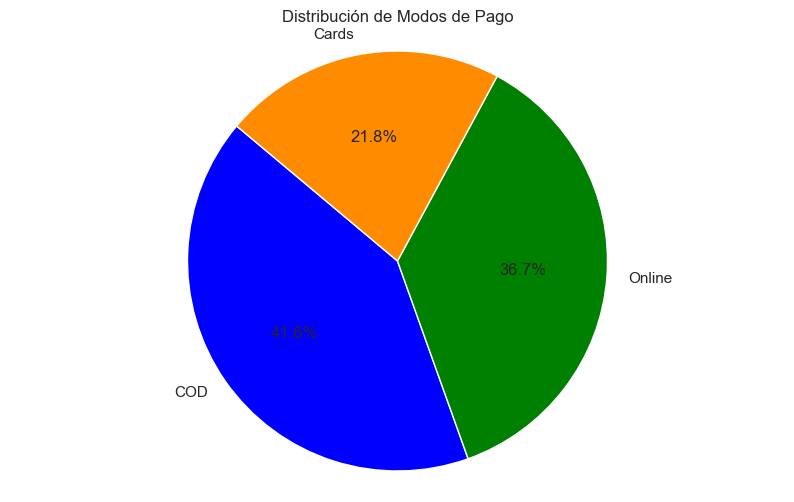

In [28]:
payment_mode_counts = df['Payment Mode'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'darkorange'])
plt.axis('equal')

plt.title('Distribución de Modos de Pago')
plt.show()

### Categoría de Productos más comprada

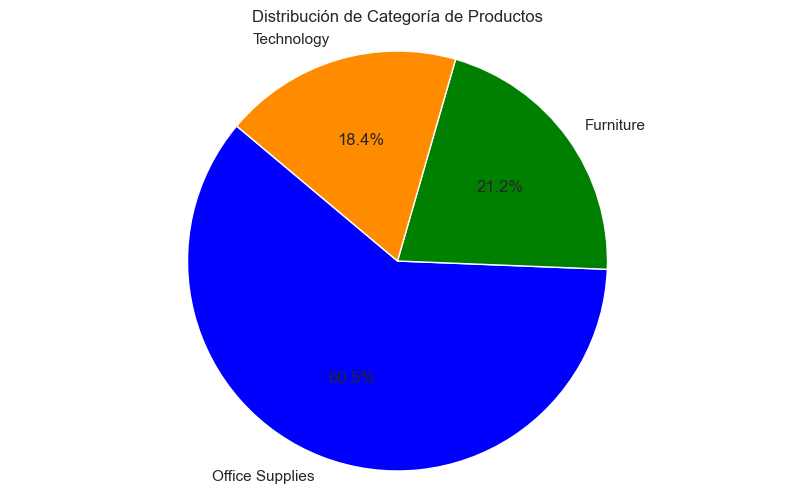

In [29]:
payment_mode_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'darkorange'])
plt.axis('equal')

plt.title('Distribución de Categoría de Productos')
plt.show()

### Top 10 ciudades con más transacciones

In [30]:

top_10_cities = df['City'].value_counts().head(10)

print("Las 10 ciudades con más transacciones son:")
print(top_10_cities)


Las 10 ciudades con más transacciones son:
City
New York City    563
Los Angeles      430
Philadelphia     310
San Francisco    304
Seattle          282
Houston          204
Chicago          197
Columbus         138
Dallas           110
Springfield      100
Name: count, dtype: int64


### Método de pago más utilizado por cada una de las top 10 ciudades

c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

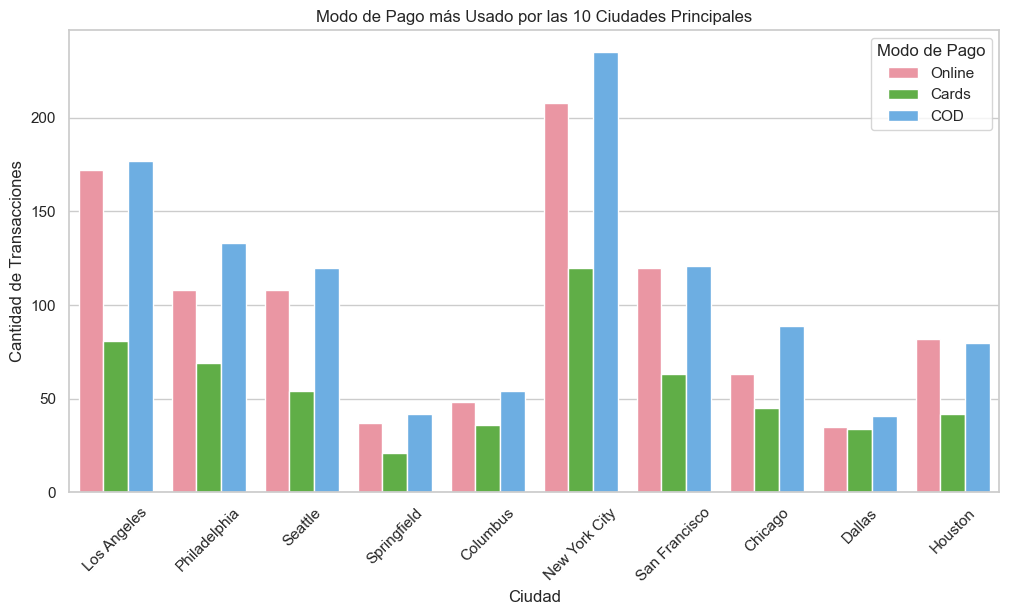

In [31]:
df_top_10_cities = df[df['City'].isin(top_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Payment Mode')
plt.title('Modo de Pago más Usado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Modo de Pago')

plt.show()

### Categoría de producto más comprada por cada una de las 10 ciudades

c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

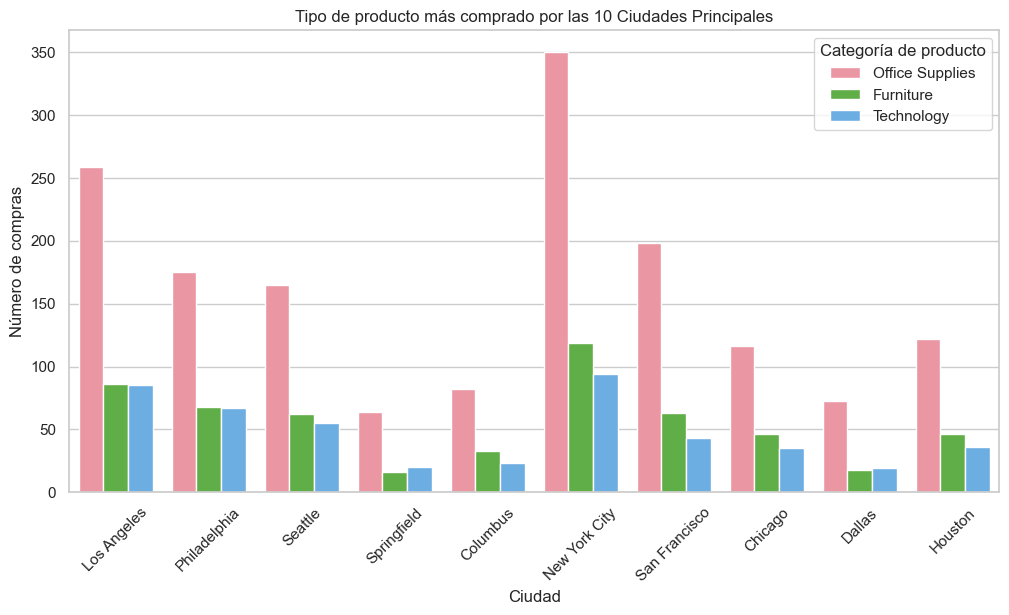

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Category')
plt.title('Tipo de producto más comprado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Número de compras')
plt.legend(title='Categoría de producto')

### Mostrar los productos que fueron regresados

In [33]:
returned=df.loc[df["Returns"]!= 0]
returned[['Product Name', 'Quantity', 'Returns']]


,Product Name,Quantity,Returns
2626,iHome FM Clock Radio with Lightning Dock,2,1.0
2635,Avery Durable Slant Ring Binders With Label Ho...,2,1.0
2637,Ibico Presentation Index for Binding Systems,5,1.0
2640,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",3,1.0
2641,Xerox 1931,7,1.0
...,...,...,...
5880,"Bush Westfield Collection Bookcases, Medium Ch...",2,1.0
5890,Acco Glide Clips,5,1.0
5892,Hand-Finished Solid Wood Document Frame,2,1.0
5895,GBC Binding covers,2,1.0


### Mostrar las ventas y ganancias

In [34]:
profit=df.loc[df["Profit"] >= 0]
profit[["Sales","Profit"]]

,Sales,Profit
0,73.940,28.2668
1,173.940,38.2668
2,231.980,67.2742
3,114.460,28.6150
6,180.960,13.5720
...,...,...
5894,509.300,56.5110
5895,496.720,6.4750
5896,213.136,12.1176
5897,295.904,4.5188


### Mostrar las transacciones con pérdidas

In [35]:
loses=df.loc[df["Profit"]<0]
loses[["Sales","Profit"]]

,Sales,Profit
4,30.0800,-5.2640
5,165.6000,-6.2100
11,104.5800,-80.1780
16,23.0760,-10.9611
20,30.8280,-24.6624
...,...,...
5875,1302.9680,-2.3904
5880,188.8528,-11.5960
5886,119.5680,-44.2764
5898,388.0240,-0.6048


### Mostrar el porcentaje total de ganancias y pérdidas con base en las ventas totales

c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\dern9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

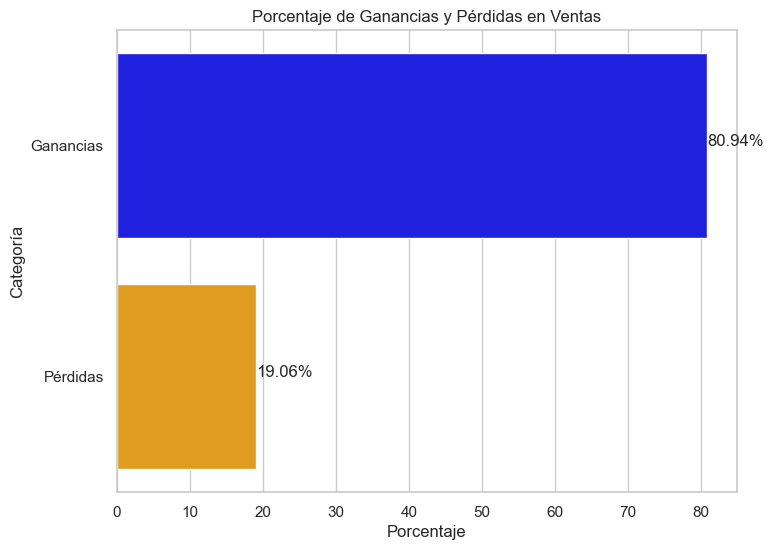

In [36]:
# Calcular los totales de ventas para ganancias y pérdidas
total_sales = df["Sales"].sum()
total_profit = profit["Sales"].sum()
total_loses = loses["Sales"].sum()

# Calcular los porcentajes
percentage_profit = (total_profit / total_sales) * 100
percentage_loses = (total_loses / total_sales) * 100

# Crear un DataFrame para los datos
data = {
    "Categoría": ["Ganancias", "Pérdidas"],
    "Porcentaje": [percentage_profit, percentage_loses]
}

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
colors = ["blue", "orange"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x="Porcentaje", y="Categoría", data=data)
plt.title("Porcentaje de Ganancias y Pérdidas en Ventas")
plt.xlabel("Porcentaje")
plt.ylabel("Categoría")

# Mostrar el porcentaje en las barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha="left")

plt.show()


### Correlación entre ventas, ganancias y las devoluciones

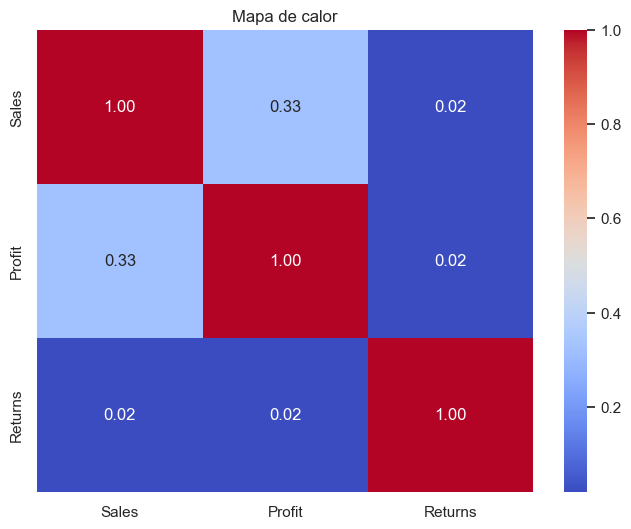

In [37]:
columns = ["Sales", "Profit", "Returns"]
correlation_matrix = df[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor")
plt.show()

# Balanceamos las clases

In [39]:
# Dividir el dataset en características (X) y etiquetas (y)
y = df['Category']
X = df.drop(columns=['Category'])

class_counts = y.value_counts()

# Encontrar la clase con la menor cantidad de ejemplos
min_class_count = class_counts.min()

# Crear un muestreador RandomOverSampler
ros = RandomOverSampler(sampling_strategy={class_name: min_class_count for class_name in class_counts.index}, random_state=42)

# Aplicar Random Oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar la distribución de clases después del balanceo
c = balanced_df['Category'].value_counts()
print(c)

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 3569 samples and 1083 samples are asked.